# Library

In [23]:
#preprocessing data
import os
import pandas as pd
import matplotlib.pyplot as plt

#split data
from sklearn.model_selection import train_test_split

#handling imbalanced data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

#feauture extraction (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

#Model Building & training
from sklearn.neural_network import MLPClassifier

#Cross Validation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

#report evaluation model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Preprocessing Data

## Import Data

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
current_directory = os.path.dirname(os.path.abspath("Neural_Network.ipynb"))

In [4]:
df_train = pd.read_csv(current_directory + "\\Clean_dataset\\Clean_train_preprocess.csv")
df_train.head()

,text,label,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung dimiliki pengusaha pabrik tahu puluhan ...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k mmbri hujjah pak ai apa ha...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung tempat ...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia diri unboxing paket barang bagu...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh jadi mahasiswa jangan sombong dong kasih ...


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10933 entries, 0 to 10932
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        10933 non-null  object
 1   label       10933 non-null  object
 2   text_clean  10933 non-null  object
dtypes: object(3)
memory usage: 256.4+ KB


In [7]:
df_train['label'].value_counts()

label
positive    6383
negative    3412
neutral     1138
Name: count, dtype: int64

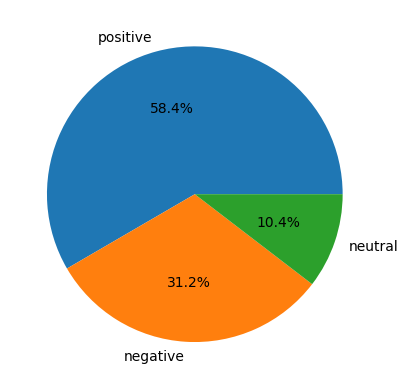

In [10]:
plt.pie([6383, 3412, 1138], labels= ['positive', 'negative', 'neutral'], autopct='%1.1f%%')
plt.show()

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_text = df_train[['text_clean']]
labels = df_train['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_text, labels, test_size=0.2, random_state=42)

In [ ]:
print('Train Data: ', len(X_train))
print('Test Data: ', len(X_test))

### Train Data Checking

In [12]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [ ]:
Counter(y_train)

In [ ]:
ROS = RandomOverSampler()
X_train_ros, y_train_ros = ROS.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_ros)

# Feature Extraction using TF-IDF

In [ ]:
#Convert X_train_text into list form
Train_preprocessed = X_train_ros.text_clean.tolist()
Train_preprocessed[0:5]

In [ ]:
#Convert X_test_text into list form
Test_preprocessed = X_test.text_clean.tolist()
Test_preprocessed[0:5]

### TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Proses Feature Extraction
count_vect = TfidfVectorizer()
count_vect.fit_transform(Train_preprocessed)

In [ ]:
#inisiasi value
X_train = count_vect.fit_transform(Train_preprocessed)
print("Feature Extraction For Train Data Has Successfully Completed")

X_test = count_vect.transform(Test_preprocessed)
print("Feature Extraction For Test Data Has Successfully Completed")

In [ ]:
# save count_vectore for API
# pickle.dump(count_vect, open("count_vect.p", "wb"))

In [ ]:
y_train = y_train_ros

In [ ]:
print(X_train[:10])

In [ ]:
print(X_test[:10])

In [ ]:
y_train_label[:10]

In [ ]:
y_train[:10]

In [ ]:
y_test[:10]

# Model Neural Network (MLP Classifier)

In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [ ]:
model_MLP = MLPClassifier( early_stopping=True, validation_fraction=0.25)
model_MLP.fit(X_train, y_train)

print('Training selesai')

In [ ]:
#Save Model
#pickle.dump(model_MLP, open("Model_MLP.p", "wb"))

In [ ]:
plt.plot(model_MLP.loss_curve_, label='loss curve')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#validation score
plt.plot(model_MLP.validation_scores_, label= 'validation score')
plt.title("Validation Score", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {
#     'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
#     'max_iter': [50, 100, 200],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
#     'early_stopping': [True],
#     'validation_fraction': [0.25]
# }

In [ ]:
# grid = GridSearchCV(model_MLP, param_grid, n_jobs= -1)
# grid.fit(X_train, y_train)

# print(grid.best_params_)

In [ ]:
# grid_predictions = grid.predict(X_test) 

# print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

## Cross-Validation

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
#Shuffle Data
kf = KFold(n_splits=4, random_state=42, shuffle=True)

In [ ]:
accuracies = []

X = X_train
y = y_train

for iteration, data in enumerate(kf.split(X), start=1):
    # ------------------------------ TRAIN DATASET ----------------------------------
    data_train = X[data[0]]
    target_train = y[data[0]]
    
    #Save Train Dataset
    # pickle.dump(clf, open(f"X_train_{iteration}.p", "wb"))
    # pickle.dump(clf, open(f"y_train_{iteration}.p", "wb"))

    # ------------------------------- TEST DATASET ----------------------------------
    data_test = X[data[1]]
    target_test = y[data[1]]

    #Save Test Dataset
    # pickle.dump(clf, open(f"X_test_{iteration}.p", "wb"))
    # pickle.dump(clf, open(f"y_test_{iteration}.p", "wb"))

    # ----------------------------------- MODEL -------------------------------------
    clf = MLPClassifier(early_stopping=True)
    clf.fit(data_train, target_train)

    #save every model
    # pickle.dump(clf, open(f"model_MLP_{iteration}.p", "wb"))

    # ----------------------------- PREDICTION (TEST) -------------------------------
    preds = clf.predict(data_test)
    accuracy = accuracy_score(target_test, preds)

    # ----------------------------- PRINT REPORT ------------------------------------
    print("Training ke", iteration)
    print(classification_report(target_test, preds))
    print("--------------------------------------------------------------------------")

    accuracies.append(accuracy)

In [ ]:
average_accuracy = np.mean(accuracies)
print("Rata-rata Accuracy: ", average_accuracy)

## Evaluasi Akhir

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDispla

In [ ]:
# file = open(r"E:\BINAR\Platinum-Challenge\model_MLP.p", "rb")
# model_MLP = pickle.load(file)
# file.close()

In [ ]:
test = model_MLP.predict(X_test)
print("Testing selesai")

print(classification_report(y_test, test))

In [ ]:
#Matrix confusion
cm = confusion_matrix(y_test, test, labels=model_MLP.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_MLP.classes_)

disp.plot()
plt.show()

# Implement Model to New Dataset

## Import new data

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv(current_directory + "\\Clean_dataset\\Clean_data_Tweet.csv")
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa telat memberi kamu edan sarap bergaul ci...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang aku berpikir aku tetap percaya tuhan pa...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku aku matamu sipit tapi dilihat mana aku,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir kelihatan dongoknya awal tam...,1,1,0,1,1,0,0,0,0,0,1,0


In [28]:
df_tweet= pd.DataFrame(df[['Tweet']])
df_tweet.head()

,Tweet
0,di saat semua cowok berusaha melacak perhatian...
1,siapa telat memberi kamu edan sarap bergaul ci...
2,kadang aku berpikir aku tetap percaya tuhan pa...
3,aku aku matamu sipit tapi dilihat mana aku
4,kaum cebong kafir kelihatan dongoknya awal tam...


In [15]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794 entries, 0 to 12793
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   12794 non-null  object
dtypes: object(1)
memory usage: 100.1+ KB


In [ ]:
import re

In [ ]:
#Fucntion to Clean tweet data
def Clean(text):
    #lowercase for every word
    text = text.lower()

    #Clean Pattern
    #remove USER
    text = re.sub(r'user', ' ', text)
    #remove 'RT'
    text = re.sub(r'rt', ' ', text)
    #remove 'URL'
    text = re.sub(r'url', ' ', text)
    #remove HTTPS
    text = re.sub(r'https', ' ', text)
    #remove HTTP
    text = re.sub(r'http', ' ', text)
    #remove &amp
    text = re.sub(r'&amp', ' ', text)

    #Clean_Unnecessary_Character
    #remove \n or every word afte '\' with space
    text = re.sub(r'\\+[a-zA-Z0-9]+', ' ', text)
    #remove text emoji
    text = re.sub(r'[^a-zA-Z0-9\s]{2,}|:[a-zA-Z0-9]{0,}', ' ', text)
    #remove all unnecessary character 
    text = re.sub(r'[^0-9a-zA-Z\s]+', ' ', text)
    #remove all number
    text = re.sub(r'[0-9]+', ' ', text)
    #remove extra space
    text = re.sub(r'  +', ' ', text)
    #remove space at the start or the end of string
    text = re.sub(r'^ +| +$', '', text)
    
    return text

#tokenization Function
def tokenization(text):
    text = re.split('\W+', text)
    return text

#import file new_kamusalay.csv
kamus_alay = pd.read_csv(r"E:\BINAR\Binar-Gold-Challenge\Dataset\new_kamusalay.csv", encoding = 'ISO-8859-1', header = None)
kamus_alay = kamus_alay.rename(columns={0: 'kata alay', 1: 'arti kata'})

#Create dictionary from kamus_alay
kamus_alay_dict = dict(zip(kamus_alay['kata alay'], kamus_alay['arti kata']))

#normalization function to convert every word tha contain 'kata alay' to 'arti kata'
def normalization(text):
    newlist = []
    for word in text:
        if word in kamus_alay_dict:
            text = kamus_alay_dict[word]
            newlist.append(text)
        else:
            text = word
            newlist.append(text)
    return newlist

#remove stopwords

#list stopword from NLTK
stopword_list = ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia',
                  'ia', 'seperti', 'jika', 'sehingga', 'kembali', 'dan', 'ini', 'karena', 'kepada', 'oleh', 
                  'saat', 'sementara', 'setelah', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 
                  'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bahwa', 'atau', 'kita', 'dengan',
                  'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 
                  'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 
                  'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun',
                  'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'seolah', 'seraya', 
                  'seterusnya', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'mari', 'nanti', 'oh', 'ok', 
                  'setiap', 'sesuatu','saja', 'toh', 'walau', 'amat', 'apalagi', 'dengan', 'bahwa', 'oleh', 'aku']

stopword_list.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       'gue', 'yah', 'kayak'])

stopword_list = set(stopword_list)

#remove stopword function
def remove_stopwords(text):
    text = [word for word in text if word not in stopword_list]
    return text

#Find NUll 'String' Value 
def clean_non_existed(text):
    if text == '':
        return None
    else:
        return text

#function to run all the function
def clean_data(text):
    text = Clean(text)
    text = tokenization(text)
    text = normalization(text)
    text = remove_stopwords(text)
    text = ' '.join(text)
    text = clean_non_existed(text)

    return text

In [ ]:
df_tweet['Tweet'] = df_tweet.Tweet.apply(clean_data)
df_tweet.head()

### Duplikat

In [ ]:
#duplicate check
df_tweet.duplicated().sum()

In [ ]:
df_tweet = df_tweet.drop_duplicates()

In [ ]:
df_tweet.duplicated().sum()

### Missing Value

In [ ]:
df_tweet.isna().sum()

In [ ]:
df_tweet = df_tweet.dropna()

In [ ]:
df_tweet.isna().sum()

# Prediction

### Function

In [35]:
import os
import pickle
import json

In [36]:
current_directory = os.path.dirname(os.path.abspath("Neural_Network.ipynb"))

In [37]:
file = open(current_directory + "\count_vect.p", "rb")
vectorizer = pickle.load(file)
file.close()

In [38]:
file = open(current_directory + "\Model_MLP.p", "rb")
model_MLP = pickle.load(file)
file.close()

In [39]:
def MLP_prediction(df):
    Data = df.Tweet.tolist()
    count_v = vectorizer.transform(Data)
    label = model_MLP.predict(count_v)

    jsonList = []
    for i in range(len(Data)):
        jsonList.append({"Tweet" : Data[i], "Label" : label[i]})

    return jsonList 

In [40]:
hasil_prediksi = MLP_prediction(df_tweet)

In [43]:
hasil_prediksi[:5]

[{'Tweet': 'di saat semua cowok berusaha melacak perhatian kamu lantas remehkan perhatian kasih khusus kamu basic kamu cowok bego',
  'Label': 'negative'},
 {'Tweet': 'siapa telat memberi kamu edan sarap bergaul cigax jifla calis sama siapa licew',
  'Label': 'negative'},
 {'Tweet': 'kadang aku berpikir aku tetap percaya tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan meninggalkan aku sendirian orang tuaku berencana berpisah kakakku lebih memilih jadi kristen aku anak ter',
  'Label': 'negative'},
 {'Tweet': 'aku aku matamu sipit tapi dilihat mana aku', 'Label': 'negative'},
 {'Tweet': 'kaum cebong kafir kelihatan dongoknya awal tambah dungu haha',
  'Label': 'negative'}]

In [ ]:
json_akhir = json.dumps(hasil_prediksi, indent = 1)

In [ ]:
Data = df_tweet.Tweet.tolist()
count_v = vectorizer.transform(Data)
label = model_MLP.predict(count_v)

In [ ]:
import json

jsonList = []
for i in range(len(Data)):
    jsonList.append({"Tweet" : Data[i], "Label" : label[i]})

json_akhir = json.dumps(jsonList, indent = 1)

In [ ]:
Counter(label)

In [ ]:
def predict(text):
    X = vectorizer.transform([text])
    predict = model_MLP.predict(X)[0]

    return predict

In [ ]:
df_tweet['label'] = df_tweet.Tweet.apply(predict)

In [ ]:
df_tweet.head(100)

In [ ]:
df_tweet['label'] .value_counts()

In [ ]:
df_tweet[df_tweet['label'] == 'neutral'].head(20)

In [ ]:
from json import loads, dumps

In [ ]:
result = df_tweet.to_json(orient="table")
parsed = loads(result)
dumps(parsed, indent=4)

In [ ]:
result